# Task 3 Models

1. Train the PCA models

        This results in pickled PCA models.
        
2. Train autoencoder models (as replacement for PCA)

        This results in saved autoencoder models.
        
3. Train a k-means cluster that sits on top of PCA & autoencoder

        This results in pickled k-means models.

## LOAD

In [ ]:
task_name = 'task3_jenga_openface'

In [ ]:
model_path = './models/{0}/'.format(task_name)

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import pickle

from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train = pd.read_csv(save_train_path)
Test = pd.read_csv(save_test_path)
Valid = pd.read_csv(save_valid_path)

In [ ]:
X = np.asarray(Train.to_numpy()[:,3:]).astype('float32')

In [ ]:
del Train

In [ ]:
Xtest = np.asarray(Test.to_numpy()[:,3:]).astype('float32')

In [ ]:
del Test

In [ ]:
Xvalid = np.asarray(Valid.to_numpy()[:,3:]).astype('float32')

In [ ]:
del Valid

## PCA Fit
I found 32 components to be roughly the inflection curve.
I am also creating an 18  component variant just in case we want a direct comparison with action units

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_n_32 = PCA(n_components=32)
face_pca_n_32 = pca_n_32.fit(X)

print(face_pca_n_32.explained_variance_)

[4.62986958e+06 2.72924901e+06 1.54131064e+05 7.60114494e+04
 4.60983289e+04 2.44411512e+04 2.20384570e+04 7.54350491e+03
 3.89411660e+03 2.03379428e+03 1.64928134e+03 1.51436880e+03
 1.28886949e+03 9.60896768e+02 7.84298411e+02 6.18583225e+02
 4.42433172e+02 3.89113493e+02 3.61640941e+02 3.32080838e+02
 2.67732834e+02 2.32968789e+02 2.16726353e+02 1.77223960e+02
 1.62874235e+02 1.37204049e+02 1.19198144e+02 1.09041419e+02
 1.05151185e+02 8.80904963e+01 8.07715451e+01 6.83803081e+01]


In [ ]:
pickle.dump(face_pca_n_32,open(model_path+'pca_n_32.p','wb'))

In [ ]:
pca_n_18 = PCA(n_components=18)
face_pca_n_18 = pca_n_18.fit(X)

print(face_pca_n_18.explained_variance_)

[4.62986958e+06 2.72925010e+06 1.54130942e+05 7.60114088e+04
 4.60983221e+04 2.44411377e+04 2.20384875e+04 7.54351508e+03
 3.89411914e+03 2.03379110e+03 1.64928219e+03 1.51436976e+03
 1.28886960e+03 9.60897827e+02 7.84297722e+02 6.18582854e+02
 4.42429995e+02 3.89112990e+02]


In [ ]:
pickle.dump(face_pca_n_18,open(model_path+'pca_n_18.p','wb'))

# Autoencoder
Right now just doing a single layer 
Perhaps we can try a two layer encoder / two layer decoder next?

32 Wide encoder

In [ ]:
import keras
from keras import layers

In [ ]:
print(X.shape)

(151068, 136)


In [ ]:
input_dim = X.shape[1]
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_32 = keras.Model(input_layer,decoded_layer)

encoder_32 = keras.Model(input_layer, encoded_layer)

In [ ]:
autoencoder_32.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [ ]:
autoencoder_32.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 136)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                4384      
_________________________________________________________________
dense_1 (Dense)              (None, 136)               4488      
Total params: 8,872
Trainable params: 8,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder_32.fit(X, X, epochs=2, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))

Epoch 1/2
2361/2361 [==============================] - 6s 2ms/step - loss: -3784.4416 - val_loss: -5811.1182
Epoch 2/2
2361/2361 [==============================] - 5s 2ms/step - loss: -7248.0277 - val_loss: -7316.3047


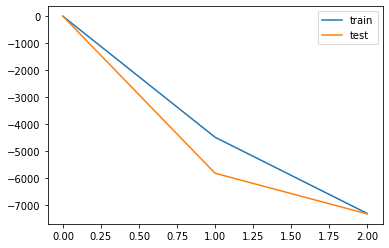

In [ ]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = autoencoder_32.predict(Xvalid)
# TODO I should probably do something with the validation set

In [ ]:
autoencoder_32.save(model_path + 'autoencoder_32.pb')
encoder_32.save(model_path + 'encoder_32.pb')

INFO:tensorflow:Assets written to: ./models/task3_jenga_openface/autoencoder_32.pb/assets
INFO:tensorflow:Assets written to: ./models/task3_jenga_openface/encoder_32.pb/assets


18 wide encoder

In [ ]:
import keras
from keras import layers

In [ ]:
input_dim = X.shape[1]
encoding_dim = 18

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_18 = keras.Model(input_layer,decoded_layer)

encoder_18 = keras.Model(input_layer, encoded_layer)

In [ ]:
autoencoder_18.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [ ]:
autoencoder_18.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 136)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                2466      
_________________________________________________________________
dense_3 (Dense)              (None, 136)               2584      
Total params: 5,050
Trainable params: 5,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder_18.fit(X, X, epochs=2, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))

Epoch 1/2
2361/2361 [==============================] - 6s 2ms/step - loss: -7496.6744 - val_loss: -8885.9824
Epoch 2/2
2361/2361 [==============================] - 5s 2ms/step - loss: -8881.9444 - val_loss: -8887.7988


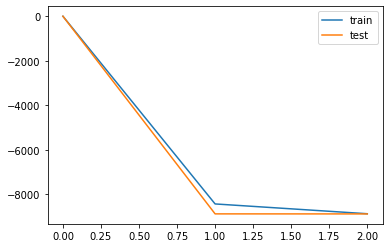

In [ ]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = autoencoder_18.predict(Xvalid)
# TODO I should probably do something with the validation set

In [ ]:
autoencoder_18.save(model_path + 'autoencoder_18.pb')
encoder_18.save(model_path + 'encoder_18.pb')

INFO:tensorflow:Assets written to: ./models/task3_jenga_openface/autoencoder_18.pb/assets
INFO:tensorflow:Assets written to: ./models/task3_jenga_openface/encoder_18.pb/assets


## K-means
Not sure what this is going to do 
(my guess is it is going to cluster similar participants)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def visualize_labels(y):
    idx = np.arange(len(y))

    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)

    ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto")
    ax1.set_yticks([])

    ax2.scatter(idx,y)

    plt.tight_layout()
    plt.show()

In [ ]:
X_pca = face_pca_n_32.transform(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_pca)

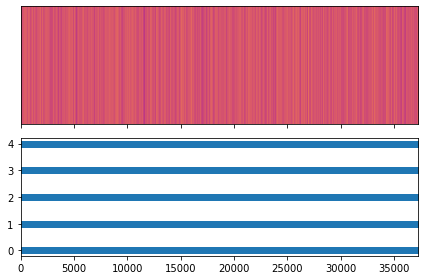

In [ ]:
y = kmeans_5.predict(face_pca_n_32.transform(Xtest))
visualize_labels(y)

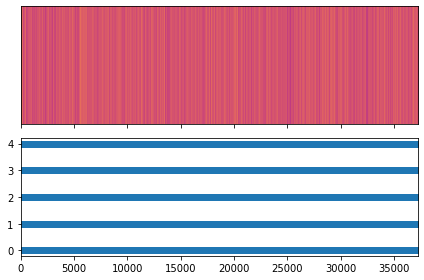

In [ ]:
y = kmeans_5.predict(face_pca_n_32.transform(Xvalid))
visualize_labels(y)

In [ ]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_pca.p','wb'))

In [ ]:
encoder_32 = keras.models.load_model(model_path + 'encoder_32.pb')

X_auto = encoder_32.predict(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_auto)

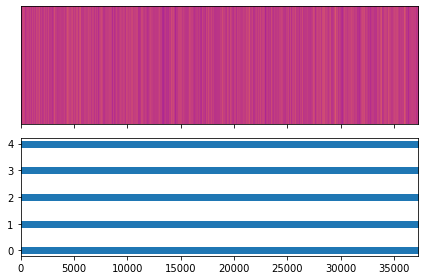

In [ ]:
y = kmeans_5.predict(encoder_32.predict(Xtest))
visualize_labels(y)

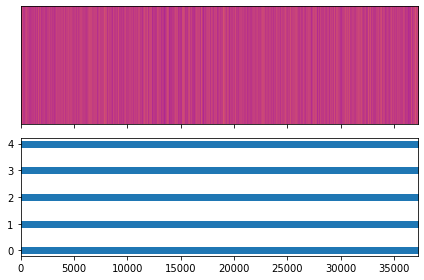

In [ ]:
y = kmeans_5.predict(encoder_32.predict(Xvalid))
visualize_labels(y)

In [ ]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_auto.p','wb'))